# [Alura] Imersão Dados
## Pesquisa de imóveis em São Paulo


# Aula 01 - Primeiro colab com Python e Pandas

## Importando base de dados

A base de dados contém informações anonimizadas sobre preços de imóveis de São Paulo - SP.

In [536]:
import pandas as pd

url_dados = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"

dados = pd.read_csv(url_dados)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


## Primeiras visualizações e informações básicas sobre os dados

In [537]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [538]:
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
9635,NaN,Cidade Antônio Estevão de Carvalho,São Paulo,60,2,1,1,R$ 320.000
3395,Avenida IV Centenário,Jardim Luzitânia,São Paulo,505,4,3,3,R$ 7.900.000
8270,NaN,Jardim Guarau,São Paulo,85,2,1,1,R$ 385.000
3026,"Rua General Bagnuolo, 173",Quinta da Paineira,São Paulo,246,3,3,2,R$ 650.000
8179,Rua Doutor Dolzani,Jardim da Glória,São Paulo,111,2,2,1,R$ 448.970
4824,Rua Alexandre Buairide,Vila Mariana,São Paulo,275,4,5,3,R$ 1.600.000
1244,Rua Maria Carolina,Jardim Paulistano,São Paulo,436,5,4,4,R$ 9.200.000
5454,Rua Corneteiro Jesus,Água Fria,São Paulo,175,3,5,2,R$ 1.290.000
1960,NaN,Vila Inah,São Paulo,460,4,3,4,R$ 3.883.000
9171,Praça Professor Vasco de Andrade,Jardim Cláudia,São Paulo,255,4,3,4,R$ 650.000


In [539]:
type(dados)

pandas.core.frame.DataFrame

In [540]:
dados['Bairro'][6522]

'Vila Paulo Silas'

O valor (preço) dos imóveis está com o tipo *object*, que não aceita cálculos matemáticos.

## Médias de metragem

In [541]:
media = dados.Metragem.mean() 
print( "Média da metragem de todos os imóveis = " + str(media))

Média da metragem de todos os imóveis = 442.30065947242207


In [542]:
bairro_consulta = "Aclimação"

filtro_imoveis_consulta = dados["Bairro"] == bairro_consulta
qnt_imoveis_consulta = sum(filtro_imoveis_consulta)

print("Há " + str(qnt_imoveis_consulta) + " imóveis no bairro " + bairro_consulta)

Há 88 imóveis no bairro Aclimação


In [543]:
imoveis_consulta = dados[filtro_imoveis_consulta]
imoveis_consulta

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
269,"Rua Ximbó, 410",Aclimação,São Paulo,140,4,3,4,R$ 800.000
670,"Rua Alabastro, 151",Aclimação,São Paulo,129,3,2,3,R$ 960.000
1265,Rua Carlos Chagas,Aclimação,São Paulo,280,3,2,2,R$ 2.200.000
1287,Rua Doutor João Maia,Aclimação,São Paulo,380,3,5,2,R$ 2.660.000
1347,Rua Doutor João Maia,Aclimação,São Paulo,385,3,5,2,R$ 2.660.000
...,...,...,...,...,...,...,...,...
9260,"Rua Doutor Rafael Caramuru Lanzelloti, 77",Aclimação,São Paulo,120,3,2,1,R$ 900.001
9366,Rua Baturité,Aclimação,São Paulo,156,3,4,1,R$ 800.000
9418,Rua André Gouveia,Aclimação,São Paulo,199,3,4,3,R$ 1.930.000
9539,Rua Rubi,Aclimação,São Paulo,1500,4,2,6,R$ 5.000.000


In [544]:
media_consulta = imoveis_consulta.Metragem.mean() 
print( "Média da metragem dos imóveis do bairro " + bairro_consulta + " = " + str(media_consulta))

Média da metragem dos imóveis do bairro Aclimação = 253.0568181818182


## Análise por bairro

In [545]:
qnt_imoveis_bairro = dados["Bairro"].value_counts()
qnt_imoveis_bairro

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

10 Bairros com mais imóveis disponíveis

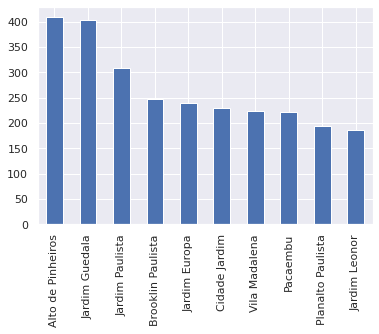

In [546]:
qnt_imoveis_bairro.head(10).plot.bar()

# Desafios

##1. Realizar a média da metragem para cada um dos bairros

In [547]:
grupo_bairros = dados.groupby('Bairro')
#grupo_bairros.groups

In [548]:
media_metragem_por_bairro = pd.DataFrame(grupo_bairros['Metragem'].mean()).rename(columns = {'Metragem':'Média da Metragem'})
media_metragem_por_bairro.sort_values(by = 'Média da Metragem', inplace = True, ascending = False)
media_metragem_por_bairro

,Média da Metragem
Bairro,
Sítio Represa,37000.00
Vila Castelo,2850.00
Jardim Guedala,2486.64
Jardim das Camélias,1700.00
Chácara Flora,1260.73
...,...
Cidade Antônio Estevão de Carvalho,57.50
Jardim Nova Germania,57.00
Jardim Benfica,48.00


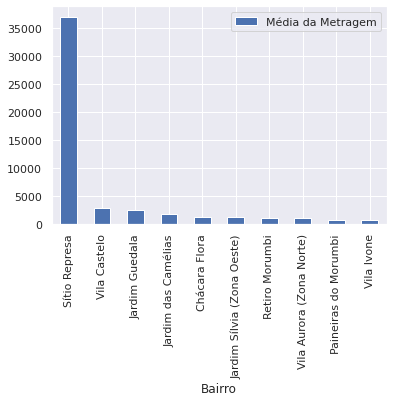

In [549]:
media_metragem_por_bairro.head(10).plot.bar()

A base de dados contém, dentre os imóveis para venda e aluguél, sítios e chácaras, que podem ser analisados separadamente.

## 2. Duas formas de selecionar os dados por bairro

1. Máscara pelo nome do bairro: gera uma series booleana que pode ser usada sobre os dados.

In [550]:
bairro_consulta = "Aclimação"

filtro_imoveis_consulta = dados["Bairro"] == bairro_consulta
dados[filtro_imoveis_consulta]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
269,"Rua Ximbó, 410",Aclimação,São Paulo,140,4,3,4,R$ 800.000
670,"Rua Alabastro, 151",Aclimação,São Paulo,129,3,2,3,R$ 960.000
1265,Rua Carlos Chagas,Aclimação,São Paulo,280,3,2,2,R$ 2.200.000
1287,Rua Doutor João Maia,Aclimação,São Paulo,380,3,5,2,R$ 2.660.000
1347,Rua Doutor João Maia,Aclimação,São Paulo,385,3,5,2,R$ 2.660.000
...,...,...,...,...,...,...,...,...
9260,"Rua Doutor Rafael Caramuru Lanzelloti, 77",Aclimação,São Paulo,120,3,2,1,R$ 900.001
9366,Rua Baturité,Aclimação,São Paulo,156,3,4,1,R$ 800.000
9418,Rua André Gouveia,Aclimação,São Paulo,199,3,4,3,R$ 1.930.000
9539,Rua Rubi,Aclimação,São Paulo,1500,4,2,6,R$ 5.000.000


2. Agrupamento por bairros: gera um DataFrameGroup que agrupa valores iguais e facilita cálculos e buscas sem precisar de for.

In [551]:
grupo_bairros = dados.groupby('Bairro')
type(grupo_bairros)

pandas.core.groupby.generic.DataFrameGroupBy

Os grupos são divididos em **valor sem repetição : index onde esses valores aparecem**.

Um dicionário com essas relações pode ser acessado pelo *.groups*

In [552]:
#grupo_bairros.groups

In [553]:
grupo_bairros.get_group(bairro_consulta)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
269,"Rua Ximbó, 410",Aclimação,São Paulo,140,4,3,4,R$ 800.000
670,"Rua Alabastro, 151",Aclimação,São Paulo,129,3,2,3,R$ 960.000
1265,Rua Carlos Chagas,Aclimação,São Paulo,280,3,2,2,R$ 2.200.000
1287,Rua Doutor João Maia,Aclimação,São Paulo,380,3,5,2,R$ 2.660.000
1347,Rua Doutor João Maia,Aclimação,São Paulo,385,3,5,2,R$ 2.660.000
...,...,...,...,...,...,...,...,...
9260,"Rua Doutor Rafael Caramuru Lanzelloti, 77",Aclimação,São Paulo,120,3,2,1,R$ 900.001
9366,Rua Baturité,Aclimação,São Paulo,156,3,4,1,R$ 800.000
9418,Rua André Gouveia,Aclimação,São Paulo,199,3,4,3,R$ 1.930.000
9539,Rua Rubi,Aclimação,São Paulo,1500,4,2,6,R$ 5.000.000


3. Filtragem por conjunto

In [554]:
consultas = ["Vila Mariana", "Aclimação"]
dados[dados.Bairro.isin(consultas)]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
269,"Rua Ximbó, 410",Aclimação,São Paulo,140,4,3,4,R$ 800.000
...,...,...,...,...,...,...,...,...
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9776,Rua Oscar Guanabarino,Aclimação,São Paulo,300,3,3,3,R$ 7.000\n /Mês
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


## 3. Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão.

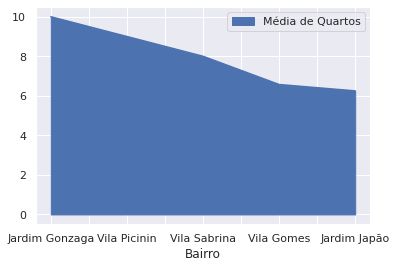

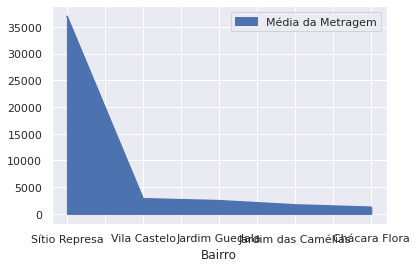

In [555]:
media_quartos_por_bairro = pd.DataFrame(grupo_bairros['Quartos'].mean()).rename(columns = {'Quartos':'Média de Quartos'})
media_quartos_por_bairro.sort_values(by = 'Média de Quartos', inplace = True, ascending = False)

media_quartos_por_bairro.head(5).plot.area()
media_metragem_por_bairro.head(5).plot.area()

Os bairros com imóveis com maiores médias de metragem não estão dentre os bairros com maiores médias de quartos por imóvel.

A falta de informação sobre o tipo de imóvel e a classificação aluguel ou venda distorce muito os possíveis resultados que podemos chegar. Por exemplo: 
  - Há imóveis com metragem muito acima da média (como o Sítio Represa) e com poucos quartos. A informação não apenas abrange o imóvel, mas também o lote completo do sítio. Este tipo de dado atrapalharia uma análise de metragem por quantidade de cômodos, por exemplo.
  - Há imóveis que estão para locação cujo valor é muito mais baixo do que o valor de venda. Essa diferença distorceria muito métricas relacionadas aos preços.

As diferenciações entre alugel e venda podem ser extraídas com um tratamento sobre a coluna "Valor", o tipo de lote pode ser extraído do nome do bairro.

## 4. Pegar outras estatísticas dos dados (como média, mediana, mim, max)

### Média

,Média da Metragem
Bairro,
Aclimação,253.06
Alto da Boa Vista,418.88
Alto da Lapa,294.34
Alto da Mooca,270.05
Alto de Pinheiros,433.44
...,...
Vila Água Funda,152.20
Água Branca,191.00
Água Fria,165.42


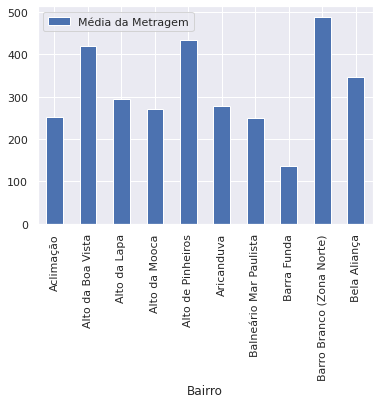

In [556]:
media_metragem_por_bairro = pd.DataFrame(grupo_bairros['Metragem'].mean()).rename(columns = {'Metragem':'Média da Metragem'})

media_metragem_por_bairro.head(10).plot.bar()
media_metragem_por_bairro

### Mediana

,Mediana da Quantidade de Quartos
Bairro,
Aclimação,3.00
Alto da Boa Vista,4.00
Alto da Lapa,3.00
Alto da Mooca,3.00
Alto de Pinheiros,4.00
...,...
Vila Água Funda,2.00
Água Branca,3.00
Água Fria,3.00


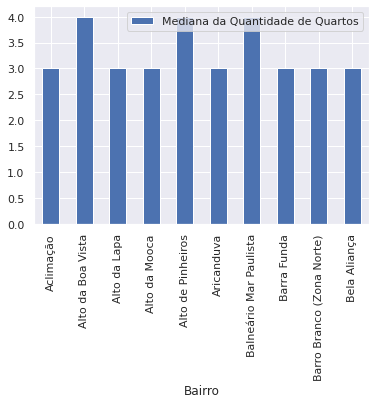

In [557]:
mediana_quartos_por_bairro = pd.DataFrame(grupo_bairros['Quartos'].median()).rename(columns = {'Quartos':'Mediana da Quantidade de Quartos'})

mediana_quartos_por_bairro.head(10).plot.bar()
mediana_quartos_por_bairro

### Mínimo (menor metragem por bairro)

,Menor Metragem
Bairro,
Aclimação,104
Alto da Boa Vista,315
Alto da Lapa,46
Alto da Mooca,84
Alto de Pinheiros,100
...,...
Vila Água Funda,90
Água Branca,91
Água Fria,60


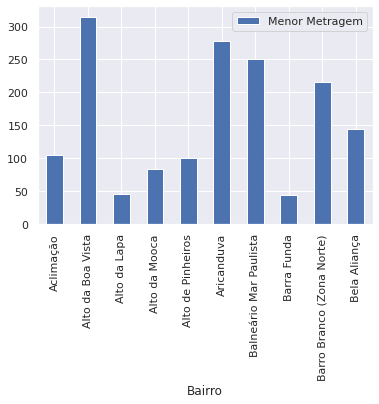

In [558]:
min_metragem_por_bairro = pd.DataFrame(grupo_bairros['Metragem'].min()).rename(columns = {'Metragem':'Menor Metragem'})

min_metragem_por_bairro.head(10).plot.bar()
min_metragem_por_bairro

### Máximo (maior metragem por bairro)

,Maior Metragem
Bairro,
Aclimação,1500
Alto da Boa Vista,595
Alto da Lapa,1133
Alto da Mooca,805
Alto de Pinheiros,1530
...,...
Vila Água Funda,200
Água Branca,400
Água Fria,314


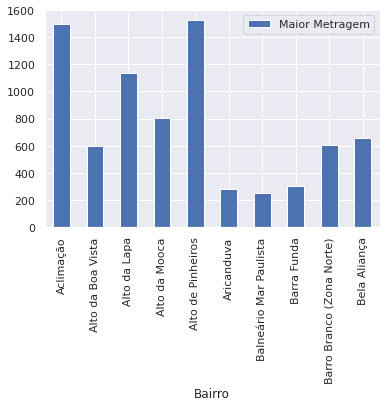

In [559]:
max_metragem_por_bairro = pd.DataFrame(grupo_bairros['Metragem'].max()).rename(columns = {'Metragem':'Maior Metragem'})

max_metragem_por_bairro.head(10).plot.bar()
max_metragem_por_bairro

## 5. Descobrir quais são os bairros que não tem nome de rua

In [560]:
ruas_nan = dados['Rua'].isnull()

In [561]:
bairros_sem_rua = dados['Bairro'][ruas_nan].drop_duplicates()
pd.DataFrame(bairros_sem_rua).rename(columns = {'Bairro':'Bairro sem rua'})

,Bairro sem rua
3,Jardim Morumbi
11,Jardim Luzitânia
31,Parque da Lapa
56,Chácara Santo Antônio (Zona Sul)
57,Jardim Guedala
...,...
9672,Jardim Vila Formosa
9774,Cupecê
9780,Jardim Itacolomi
9816,Água Rasa


# Aula 02 - Tratamento de dados e primeiros gráficos

## Tratando a coluna "Valor"

### Separação por Moeda, Valor e Tipo do anúncio

In [562]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [563]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [564]:
dados["Valor"][0]

'R$ 7.000.000'

In [565]:
dados["Valor"][0].split()

['R$', '7.000.000']

In [566]:
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6326,Rua Tordesilhas,Lapa,São Paulo,286,4,5,4,R$ 1.700.000
5230,NaN,Jardim Paulistano,São Paulo,490,4,2,5,R$ 7.000.000
4787,Avenida Doutor Orêncio Vidigal,Vila Carlos de Campos,São Paulo,198,3,3,2,R$ 560.000
2744,Avenida Jandira,Indianópolis,São Paulo,320,4,4,6,R$ 2.500.000
1243,NaN,Cidade Jardim,São Paulo,660,6,7,8,R$ 3.950.000
819,"Rua dos Escultores, 12",Boaçava,São Paulo,200,3,3,2,R$ 3.000.000
6348,NaN,Jardim Ponte Rasa,São Paulo,274,4,3,2,R$ 420.000
8055,"Rua General Calado, 192",Vila Regente Feijó,São Paulo,199,4,4,2,R$ 900.000
3603,Rua Mesquita,Vila Deodoro,São Paulo,288,6,3,1,R$ 1.250.000
6945,NaN,Planalto Paulista,São Paulo,223,3,3,2,R$ 1.600.000


In [567]:
dados["Valor"].str.split(expand = True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [568]:
dados["Valor"].str.split(expand = True)[0].unique()

array(['R$'], dtype=object)

In [569]:
len(dados["Valor"].str.split(expand = True)[1].unique())

1038

In [570]:
pd.DataFrame(dados["Valor"].str.split(expand = True)[1].unique()).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1038 non-null   object
dtypes: object(1)
memory usage: 8.2+ KB


Não há valores nulos, portanto todos os imóveis possuem um preço.

In [571]:
dados["Valor"].str.split(expand = True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [572]:
dados[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = dados["Valor"].str.split(expand = True)

In [573]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


### Conversão para valor numérico

In [574]:
dados["Valor_anuncio_float"] = dados["Valor_anuncio"].str.replace(".", "").astype(float)
dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00


In [575]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  6574 non-null   object 
 1   Bairro               9996 non-null   object 
 2   Cidade               10008 non-null  object 
 3   Metragem             10008 non-null  int64  
 4   Quartos              10008 non-null  int64  
 5   Banheiros            10008 non-null  int64  
 6   Vagas                10008 non-null  int64  
 7   Valor                10008 non-null  object 
 8   Moeda                10008 non-null  object 
 9   Valor_anuncio        10008 non-null  object 
 10  Tipo_anuncio         852 non-null    object 
 11  Valor_anuncio_float  10008 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 938.4+ KB


### Filtragem por móveis que estão à venda

In [576]:
mascara_vendas = dados["Tipo_anuncio"].isnull()
dados[mascara_vendas]["Tipo_anuncio"].unique()

array([None], dtype=object)

In [577]:
dados_vendas = dados[mascara_vendas]
dados_vendas.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00


In [578]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  6107 non-null   object 
 1   Bairro               9146 non-null   object 
 2   Cidade               9156 non-null   object 
 3   Metragem             9156 non-null   int64  
 4   Quartos              9156 non-null   int64  
 5   Banheiros            9156 non-null   int64  
 6   Vagas                9156 non-null   int64  
 7   Valor                9156 non-null   object 
 8   Moeda                9156 non-null   object 
 9   Valor_anuncio        9156 non-null   object 
 10  Tipo_anuncio         0 non-null      object 
 11  Valor_anuncio_float  9156 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 929.9+ KB


### Primeiras métricas

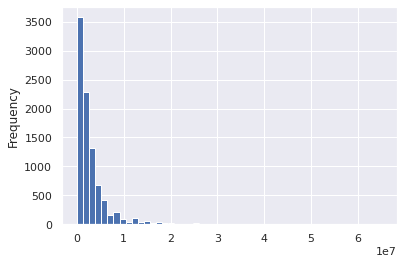

In [579]:
dados_vendas["Valor_anuncio_float"].plot.hist(bins = 50)

In [580]:
pd.set_option("display.precision", 2)
pd.set_option("display.float_format", lambda x: '%.2f' % x)
dados_vendas.describe(include = "all")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float
count,6107,9146,9156,9156.00,9156.00,9156.00,9156.00,9156,9156,9156,0,9156.00
unique,3006,697,1,NaN,NaN,NaN,NaN,939,1,939,0,NaN
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000,R$,2.500.000,NaN,NaN
freq,24,369,9156,NaN,NaN,NaN,NaN,182,9156,182,NaN,NaN
mean,NaN,NaN,NaN,434.42,3.45,3.80,3.96,NaN,NaN,NaN,NaN,3052202.96
std,NaN,NaN,NaN,7856.42,1.05,1.97,2.60,NaN,NaN,NaN,NaN,3944208.19
min,NaN,NaN,NaN,10.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN,13000.00
25%,NaN,NaN,NaN,168.00,3.00,2.00,2.00,NaN,NaN,NaN,NaN,890000.00
50%,NaN,NaN,NaN,276.00,3.00,4.00,4.00,NaN,NaN,NaN,NaN,1800000.00
75%,NaN,NaN,NaN,450.00,4.00,5.00,5.00,NaN,NaN,NaN,NaN,3500000.00


## Plotagem de gráficos

In [581]:
import seaborn as sns
import matplotlib.pyplot as plt

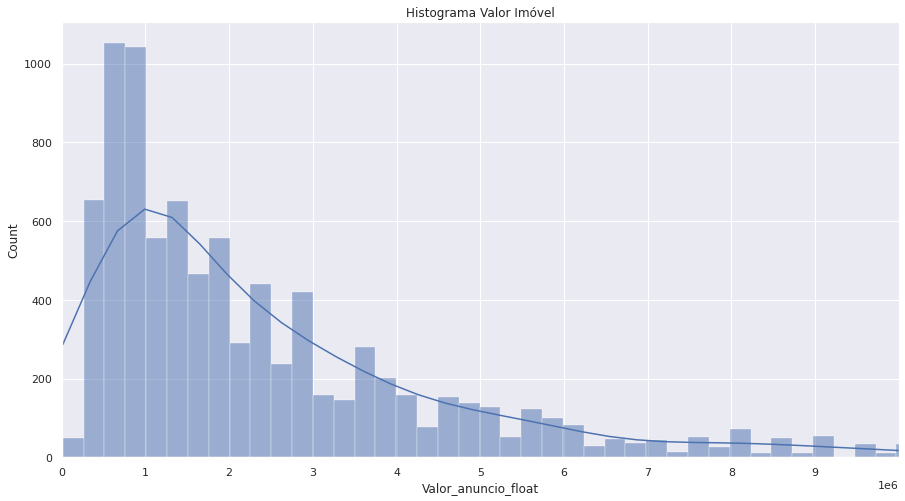

In [582]:
sns.set()
plt.figure(figsize = (15,8))

ax = sns.histplot(data = dados_vendas, x = "Valor_anuncio_float", kde = True)
ax.set_title("Histograma Valor Imóvel")

plt.xlim((-50, 10000000))
plt.xticks(range(0, 10000000, 1000000))

plt.show()

# Desafios

##1. Criar uma escala de valores em milhões
##2. Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)

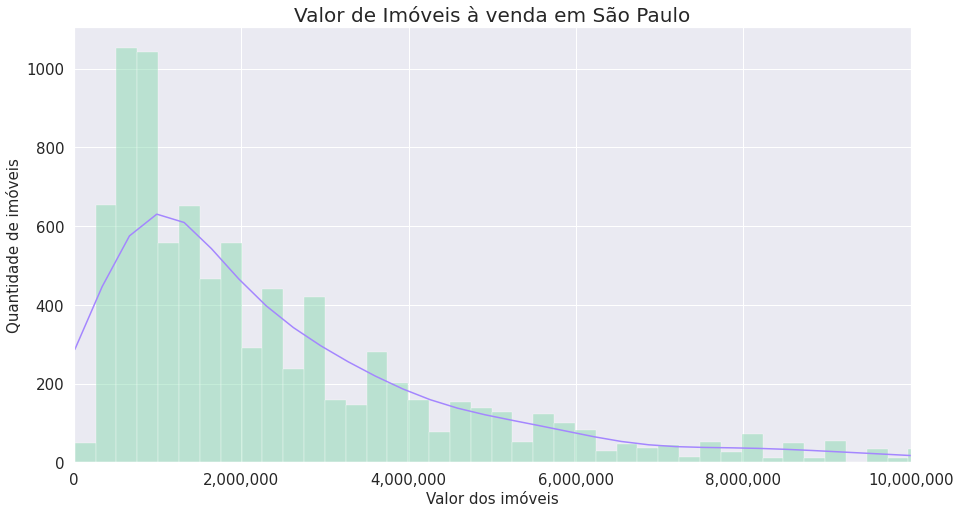

In [583]:
import matplotlib as mpl

sns.set()
plt.figure(figsize = (15,8))

sns.set_palette("mako_r")

ax = sns.histplot(data = dados_vendas, x = "Valor_anuncio_float", kde = True)
ax.set_title("Valor de Imóveis à venda em São Paulo", fontsize = 20)

plt.xlim((-50, 10000000))

plt.ylabel("Quantidade de imóveis", fontsize = 15)
plt.xlabel("Valor dos imóveis", fontsize = 15)
ax.tick_params(axis = 'both', labelsize = 15)
#ax.ticklabel_format(style='plain', axis='both', useLocale = True)
ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x,_ : format(int(x), ',')))
ax.lines[0].set_color('#a486ff')

plt.show()

##3. Preço do metro quadrado por bairro e plotar em um gráfico

In [584]:
grupo_bairros_vendas = dados_vendas.groupby('Bairro')

media_valor_venda_por_bairro = pd.DataFrame(grupo_bairros_vendas['Valor_anuncio_float'].sum()/grupo_bairros_vendas['Metragem'].sum()).rename(columns = {0:'Média do valor de venda'})
media_valor_venda_por_bairro.sort_values(by = 'Média do valor de venda', inplace = True, ascending = False)
media_valor_venda_por_bairro = media_valor_venda_por_bairro.reset_index()
media_valor_venda_por_bairro.head(20)

,Bairro,Média do valor de venda
0,Vila Guaca,80000.00
1,Jardim América,25417.48
2,Jardim Teresa,22884.32
3,Jardim Europa,20304.57
4,Vila Nova Conceição,17576.07
5,Morro dos Ingleses,17357.14
6,Jardim Luzitânia,16961.10
7,Jardim Paulista,16395.70
8,Jardim Paulistano,14913.54
9,São Judas,14889.06


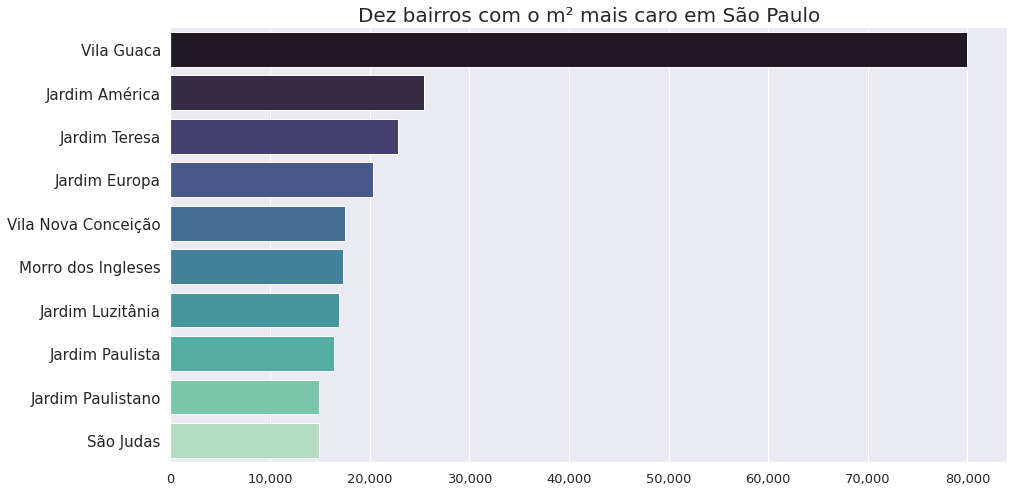

In [585]:
sns.set()
plt.figure(figsize = (15,8))


ax2 = sns.barplot(data = media_valor_venda_por_bairro.head(10), x = "Média do valor de venda", y = "Bairro", palette = 'mako')
ax2.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x,_ : format(int(x), ',')))

ax2.set_title("Dez bairros com o m² mais caro em São Paulo", fontsize = 20)
ax2.tick_params(axis = 'y', labelsize = 15)
ax2.tick_params(axis = 'x', labelsize = 13)
plt.ylabel("")
plt.xlabel("")

plt.show()

##4. Explorar as bibliotecas de visualizações e colocar as suas conclusão

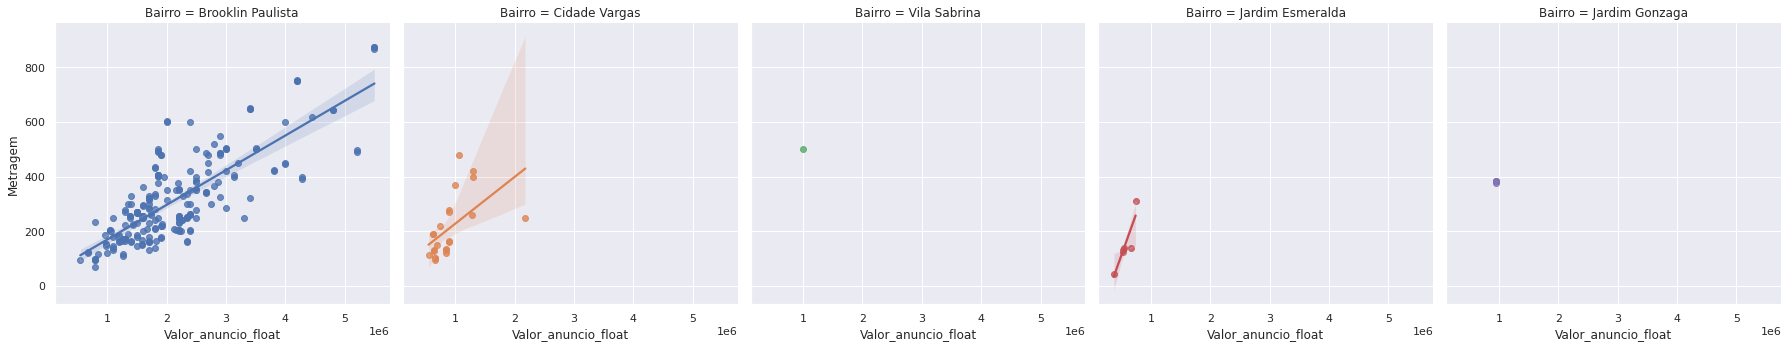

In [586]:
import numpy as np

#bairros_busca = ["Jardim América", "Pinheiros", "Moema", "Jardim Paulistano"]
bairros_busca = np.random.choice(dados_vendas["Bairro"].unique(), 5)
filtro_busca = dados_vendas["Bairro"].isin(bairros_busca)

ax4 = sns.lmplot(data = dados_vendas[filtro_busca], x = "Valor_anuncio_float", y = "Metragem", hue="Bairro", col = "Bairro")

Dentre os bairros buscados, um imóvel tende a valer mais quanto maior for sua metragem, mas a proporção de crescimento varia entre os bairros.

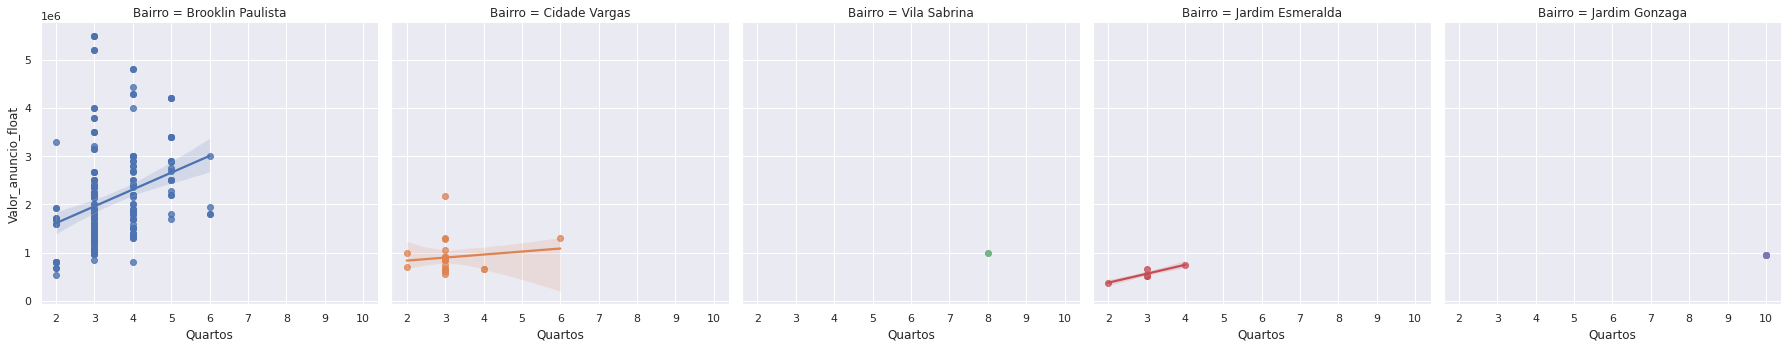

In [587]:
ax5 = sns.lmplot(data = dados_vendas[filtro_busca], x = "Quartos", y = "Valor_anuncio_float", hue="Bairro", col = "Bairro")

Um comportamento semelhante pode ser observado na relação Valor x Quantidade de Quartos.

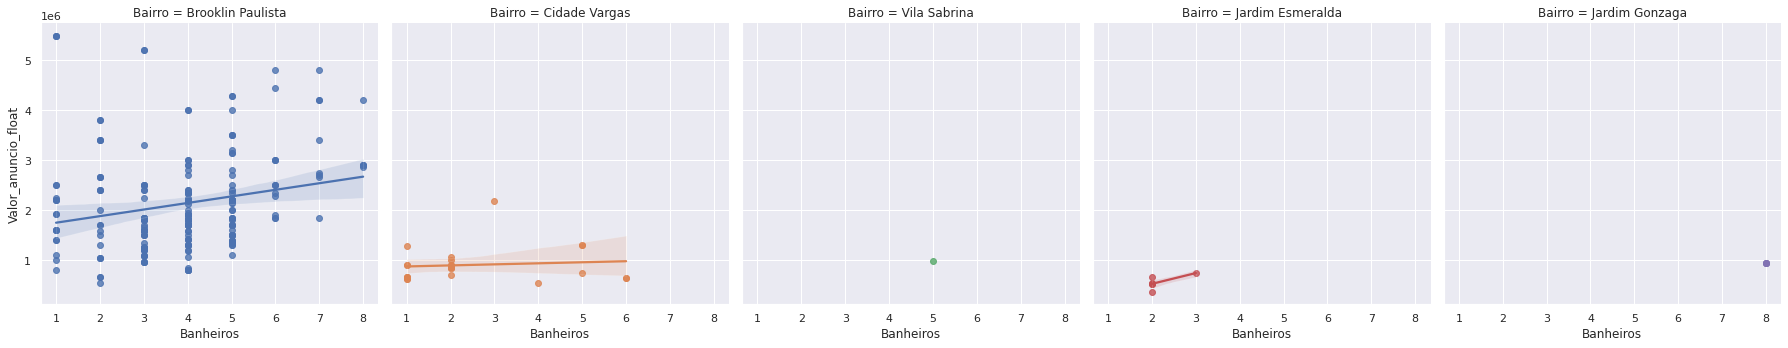

In [588]:
ax6 = sns.lmplot(data = dados_vendas[filtro_busca], x = "Banheiros", y = "Valor_anuncio_float", hue="Bairro", col = "Bairro")

Em alguns bairros, a Relação Valor x Quantidade de Banheiros é decrescente.

Em todos os gráficos acima, já é possível identificar que há outliers dentre os dados.

##5. Pesquisar uma visualização para analisar os quartis, mediana e outliers.

A gráfico na forma Boxplot explicita visualmente os quartis, a mediana e os outliers.

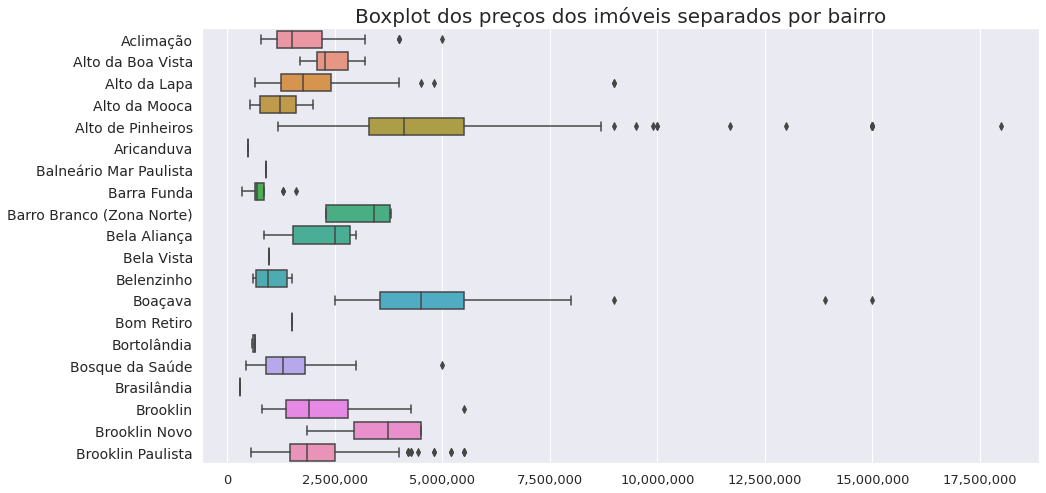

In [589]:
plt.figure(figsize = (15,8))
ax3 = sns.boxplot(x = "Valor_anuncio_float", y = "Bairro", data = dados_vendas.sort_values(by = "Bairro").head(1100))
ax3.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x,_ : format(int(x), ',')))
ax3.set_title("Boxplot dos preços dos imóveis separados por bairro", fontsize = 20)
ax3.tick_params(axis = 'y', labelsize = 14)
ax3.tick_params(axis = 'x', labelsize = 13)
plt.ylabel("")
plt.xlabel("")

plt.show()

Neste gráfico, podemos concluir que há preços de venda que são outliers em alguns bairros. Ou seja, alguns imóveis estão com seus preços muito acima da média em relação ao restante do bairro.

# Aula 03 - Gráficos, Time Series e Análise Exploratória


### Solução do Desafio 03 da Aula 02

In [590]:
dados_vendas["Valor_m2"] = dados_vendas["Valor_anuncio_float"]/dados_vendas["Metragem"]
dados_vendas.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00


In [591]:
dados_bairro = dados_vendas.groupby("Bairro").mean()
dados_bairro.head()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2
Bairro,,,,,,
Aclimação,246.16,3.27,3.04,2.91,1763200.01,7656.17
Alto da Boa Vista,418.88,4.12,5.12,4.62,2391250.00,5849.57
Alto da Lapa,299.25,3.15,3.85,4.00,2083168.75,7606.73
Alto da Mooca,270.05,3.30,2.60,3.65,1184170.00,5691.74
Alto de Pinheiros,429.85,3.94,4.83,4.95,4782698.96,11269.98


In [592]:
#dados_vendas.groupby("Bairro").mean().sort_values(by = 'Valor_m2', ascending = False)
dados_bairro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 697 entries, Aclimação to Água Rasa
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Metragem             697 non-null    float64
 1   Quartos              697 non-null    float64
 2   Banheiros            697 non-null    float64
 3   Vagas                697 non-null    float64
 4   Valor_anuncio_float  697 non-null    float64
 5   Valor_m2             697 non-null    float64
dtypes: float64(6)
memory usage: 38.1+ KB


In [593]:
dados_bairro.reset_index(inplace = True)
dados_bairro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bairro               697 non-null    object 
 1   Metragem             697 non-null    float64
 2   Quartos              697 non-null    float64
 3   Banheiros            697 non-null    float64
 4   Vagas                697 non-null    float64
 5   Valor_anuncio_float  697 non-null    float64
 6   Valor_m2             697 non-null    float64
dtypes: float64(6), object(1)
memory usage: 38.2+ KB


In [594]:
dados_bairro["Valor_m2_bairro"] = dados_bairro["Valor_anuncio_float"]/dados_bairro["Metragem"]
dados_bairro.sort_values(by = 'Valor_m2_bairro', ascending = False)

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2,Valor_m2_bairro
527,Vila Guaca,10.00,3.00,2.00,2.00,800000.00,80000.00,80000.00
103,Jardim América,646.31,4.04,5.08,7.13,16427596.64,24088.57,25417.48
277,Jardim Teresa,648.33,5.00,6.00,6.00,14836666.67,17465.56,22884.32
155,Jardim Europa,566.18,3.79,4.73,5.03,11496061.43,19962.69,20304.57
597,Vila Nova Conceição,299.32,2.98,3.38,3.24,5260913.98,17614.03,17576.07
...,...,...,...,...,...,...,...,...
120,Jardim Brasília (Zona Leste),303.33,3.00,2.00,2.00,320000.00,1055.01,1054.95
177,Jardim Itapemirim,204.00,2.00,1.00,1.00,215118.00,1054.50,1054.50
453,Vila Aurea,182.00,3.00,1.00,2.00,165000.00,906.59,906.59
290,Jardim Vera Cruz(Zona Leste),642.50,3.00,2.00,5.00,350000.00,544.76,544.75


In [595]:
# Bairros com maior número de imóveis registrados no conjunto de dados
top_bairros = dados_vendas["Bairro"].value_counts()[:10].index
type(top_bairros)

pandas.core.indexes.base.Index

In [596]:
dados_bairro.query("Bairro in @top_bairros")

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2,Valor_m2_bairro
4,Alto de Pinheiros,429.85,3.94,4.83,4.95,4782698.96,11269.98,11126.34
19,Brooklin Paulista,312.51,3.47,3.85,3.71,2124092.81,7264.92,6796.90
57,Cidade Jardim,692.25,4.13,5.28,6.14,6095345.03,8563.84,8805.10
155,Jardim Europa,566.18,3.79,4.73,5.03,11496061.43,19962.69,20304.57
168,Jardim Guedala,2754.14,4.09,5.74,6.12,5102452.09,8028.00,1852.65
187,Jardim Leonor,571.42,4.10,5.54,5.31,3801919.82,6563.88,6653.49
227,Jardim Paulista,489.79,3.86,4.63,4.40,8030379.70,16087.45,16395.70
338,Pacaembu,501.43,3.87,4.45,5.14,4339782.50,8768.36,8654.90
396,Planalto Paulista,322.01,3.46,4.17,3.88,2037538.04,6447.72,6327.54
564,Vila Madalena,334.60,3.73,3.97,3.60,2945722.37,9054.40,8803.82


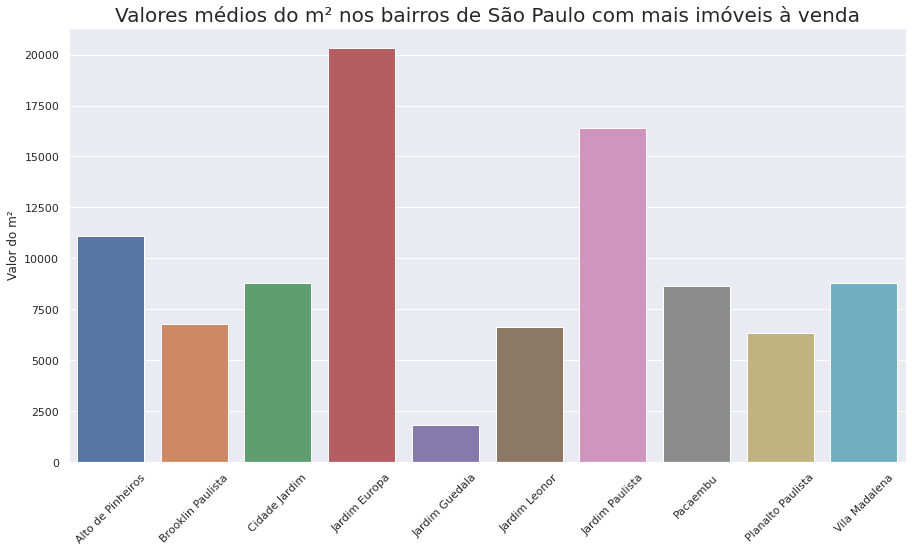

In [597]:
plt.figure(figsize = (15,8))
ax6 = sns.barplot(x = "Bairro", y = "Valor_m2_bairro", data = dados_bairro.query("Bairro in @top_bairros"))
ax6.tick_params(axis = 'x', rotation = 45)
ax6.set_title("Valores médios do m² nos bairros de São Paulo com mais imóveis à venda", fontsize = 20)
plt.ylabel("Valor do m²")
plt.xlabel("")
plt.show()

A diferença entre a solução acima (feita durante a aula) e a solução anterior (feita por mim), está no critério usado para selecionar quais bairros teriam seu valor por m² exibidos em gráfico.

No gráfico anterior (aula 02 desafio 03), os bairros analisados estão ordenados por maior valor po m². [sort_values]

Já no gráfico acima, foram escolhidos os bairros com mais imóveis registrados no dataset. [value_counts]

## Boxplots para identificação de outliers e possíveis soluções

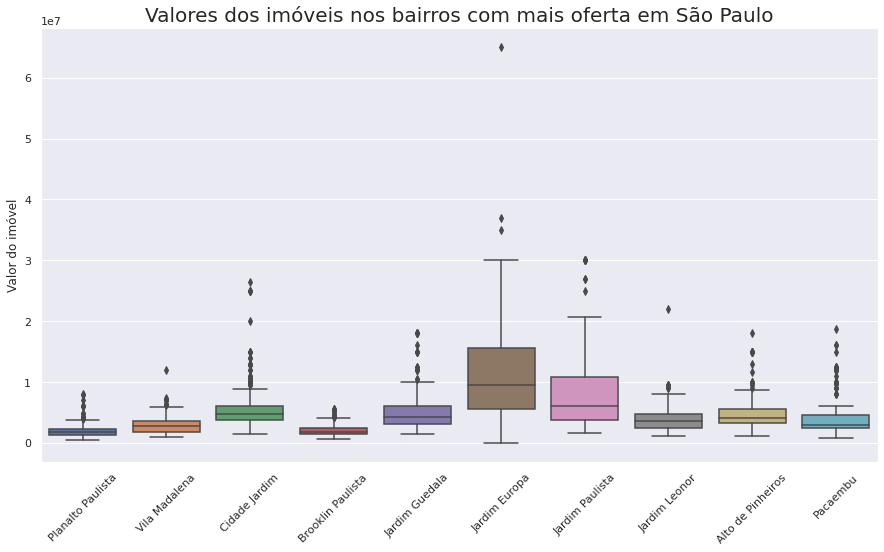

In [598]:
plt.figure(figsize = (15,8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros"), x = "Bairro", y = "Valor_anuncio_float")
ax.set_title("Valores dos imóveis nos bairros com mais oferta em São Paulo", fontsize = 20)
ax.tick_params(axis = 'x', rotation = 45)
plt.ylabel("Valor do imóvel")
plt.xlabel("")
plt.show()

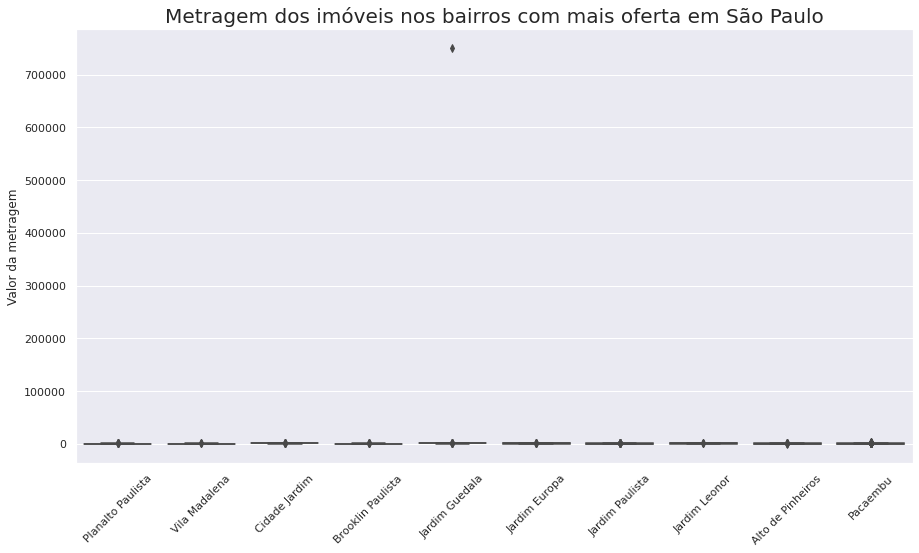

In [599]:
plt.figure(figsize = (15,8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros"), x = "Bairro", y = "Metragem")
ax.set_title("Metragem dos imóveis nos bairros com mais oferta em São Paulo", fontsize = 20)
ax.tick_params(axis = 'x', rotation = 45)
plt.ylabel("Valor da metragem")
plt.xlabel("")
plt.show()

O Jardim Guedala possui um imóvel com metragem muito acima de todos os outros, então fizemos uma filtragem a mais.

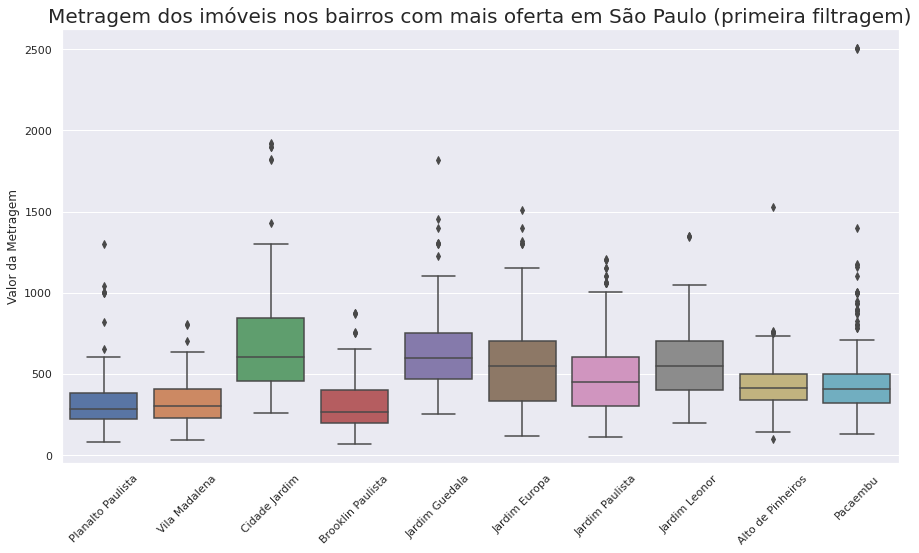

In [600]:
plt.figure(figsize = (15,8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros & Metragem < 30000"), x = "Bairro", y = "Metragem")
ax.set_title("Metragem dos imóveis nos bairros com mais oferta em São Paulo (primeira filtragem)", fontsize = 20)
ax.tick_params(axis = 'x', rotation = 45)
plt.ylabel("Valor da Metragem")
plt.xlabel("")
plt.show()

Agora outros ouliers menos discrepantes podem ser identificados ao analisarmos a metragem dos imóveis por bairro.

## Nova base de dados do IBGE

In [601]:
ibge_url = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"
pd.read_csv(ibge_url).head(2)

,,,,,,,,,,Cod_setor;Cod_Grandes Regi�es;Nome_Grande_Regiao;Cod_UF;Nome_da_UF ;Cod_meso;Nome_da_meso;Cod_micro;Nome_da_micro;Cod_RM;Nome_da_RM;Cod_municipio;Nome_do_municipio;Cod_distrito;Nome_do_distrito;Cod_subdistrito;Nome_do_subdistrito;Cod_bairro;Nome_do_bairro;Situacao_setor;Tipo_setor;V001;V002;V003;V004;V005;V006;V007;V008;V009;V010;V011;V012;
"355030801000001;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;266;800;3",01;2,32;2091,32;8532451,78;2164,55;8673276,78;1227,41;4285771,99;1713,75;5152087,86.00
"355030801000002;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;306;913;2",98;2,09;1650,09;3983441,31;1717,44;4030519,99;1045,78;2572133,32;1468,08;2991546,94.00


# Desafios

### Organizar Dados do IBGE

O significado de cada uma das colunas pode ser consultado na [documentação do IBGE](https://drive.google.com/file/d/1WVTqfKtHOOk5X1AWaSOn6NLaO7cix2m4/view), seção 6.1.

In [602]:
dados_ibge = pd.read_csv(ibge_url, sep = ";", encoding='utf-8', decimal=',')
dados_ibge.head()

,Cod_setor,Cod_Grandes Regi�es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,Unnamed: 33
0,355030801000001,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86,NaN
1,355030801000002,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94,NaN
2,355030801000003,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74,NaN
3,355030801000004,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24,NaN
4,355030801000005,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85,NaN


In [603]:
dados_ibge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cod_setor            18363 non-null  int64  
 1   Cod_Grandes Regi�es  18363 non-null  int64  
 2   Nome_Grande_Regiao   18363 non-null  object 
 3   Cod_UF               18363 non-null  int64  
 4   Nome_da_UF           18363 non-null  object 
 5   Cod_meso             18363 non-null  int64  
 6   Nome_da_meso         18363 non-null  object 
 7   Cod_micro            18363 non-null  int64  
 8   Nome_da_micro        18363 non-null  object 
 9   Cod_RM               18363 non-null  int64  
 10  Nome_da_RM           18363 non-null  object 
 11  Cod_municipio        18363 non-null  int64  
 12  Nome_do_municipio    18363 non-null  object 
 13  Cod_distrito         18363 non-null  int64  
 14  Nome_do_distrito     18363 non-null  object 
 15  Cod_subdistrito      18363 non-null 

In [604]:
dados_ibge["Nome_do_subdistrito"].unique()

array(['�GUA RASA', 'ALTO DE PINHEIROS', 'ANHANGUERA', 'ARICANDUVA',
       'ARTUR ALVIM', 'BARRA FUNDA', 'BELA VISTA', 'BEL�M', 'BOM RETIRO',
       'BR�S', 'BRASIL�NDIA', 'BUTANT�', 'CACHOEIRINHA', 'CAMBUCI',
       'CAMPO BELO', 'CAMPO GRANDE', 'CAMPO LIMPO', 'CANGAIBA',
       'CAP�O REDONDO', 'CARR�O', 'CASA VERDE', 'CIDADE ADEMAR',
       'CIDADE DUTRA', 'CIDADE LIDER', 'CIDADE TIRADENTES', 'CONSOLA��O',
       'CURSINO', 'ERMELINO MATARAZZO', 'FREGUESIA DO �', 'GRAJA�',
       'GUAIANASES', 'MOEMA', 'IGUATEMI', 'IPIRANGA', 'ITAIM BIBI',
       'ITAIM PAULISTA', 'ITAQUERA', 'JABAQUARA', 'JA�AN�', 'JAGUARA',
       'JAGUAR�', 'JARAGU�', 'JARDIM �NGELA', 'JARDIM HELENA',
       'JARDIM PAULISTA', 'JARDIM S�O LU�S', 'JOS� BONIF�CIO', 'LAPA',
       'LIBERDADE', 'LIM�O', 'MANDAQUI', 'MARSILAC', 'MOOCA', 'MORUMBI',
       'PARELHEIROS', 'PARI', 'PARQUE DO CARMO', 'PEDREIRA', 'PENHA',
       'PERDIZES', 'PERUS', 'PINHEIROS', 'PIRITUBA', 'PONTE RASA',
       'RAPOSO TAVARES', 'REP�BLICA

Aparentemente, essa coluna possui o nome dos bairros que podem ser usados para cruzar dados com o dataset de imóveis. Ainda não encontrei uma forma promissora de converter ou substituir os caracteres ilegíveis. A substituição direta de trechos da string pode gerar nomes com escrita incorreta.

## 1. Tentar vincular dados do IBGE com os dados de imóveis.

A coluna "V003" armazena a média do número de moradores em domicílios
particulares permanentes. Como ainda não consigo relacionar os bairros, vou me basear nessa medida para filtrar a quantidade de quartos nos imóveis do primeiro dataset.

In [605]:
qnt_quartos = int(2 * dados_ibge["V003"].mean())
qnt_quartos

6

## 2. Tratar os outliers e comparar com os resultados.

In [606]:
dados_vendas.shape[0]

9156

In [607]:
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2
count,9156.00,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96,8004.07
std,7856.42,1.05,1.97,2.60,3944208.19,5291.32
min,10.00,1.00,1.00,1.00,13000.00,9.33
25%,168.00,3.00,2.00,2.00,890000.00,4750.00
50%,276.00,3.00,4.00,4.00,1800000.00,6500.00
75%,450.00,4.00,5.00,5.00,3500000.00,9453.78
max,750000.00,16.00,40.00,50.00,65000000.00,80000.00


In [608]:
# filtro 1: imóveis com 6 ou menos quartos
dados_vendas_filtrado = dados_vendas.query("Quartos <= @qnt_quartos")
dados_vendas_filtrado.shape[0]

9064

In [609]:
# filtro 2: imóveis com 5 ou menos banheiro (quartil 75%)
qnt_banheiros = 5
dados_vendas_filtrado = dados_vendas_filtrado.query("Banheiros <= @qnt_banheiros")
dados_vendas_filtrado.shape[0]

7468

In [610]:
# filtro 3: imóveis com 5 ou menos vagas (quartil 75%)
qnt_vagas = 5
dados_vendas_filtrado = dados_vendas_filtrado.query("Vagas <= @qnt_vagas")
dados_vendas_filtrado.shape[0]

6359

In [611]:
#filtro 4: imóveis que contêm "Sítio" ou Chácara no bairro
index_sitios = dados_vendas_filtrado[dados_vendas_filtrado['Bairro'].str.contains('Sítio', na = False)].index
index_chacaras = dados_vendas_filtrado[dados_vendas_filtrado['Bairro'].str.contains('Chácara', na = False)].index

dados_vendas_filtrado = dados_vendas_filtrado.drop(index_sitios)
dados_vendas_filtrado = dados_vendas_filtrado.drop(index_chacaras)

dados_vendas_filtrado.shape[0]

6236

In [612]:
dados_vendas_filtrado.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2
count,6236.00,6236.00,6236.00,6236.00,6236.00,6236.00
mean,256.14,3.14,3.03,2.83,1975364.90,7420.00
std,472.90,0.82,1.30,1.18,2176165.80,4601.72
min,10.00,1.00,1.00,1.00,13000.00,34.40
25%,144.00,3.00,2.00,2.00,750000.00,4573.64
50%,205.00,3.00,3.00,3.00,1290000.00,6211.18
75%,317.00,4.00,4.00,4.00,2450000.00,8869.63
max,35677.00,6.00,5.00,5.00,30000000.00,80000.00


In [613]:
dados_vendas_filtrado.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00
6,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,R$ 850.000,R$,850.000,None,850000.00,5862.07


### Comparação entre gráficos

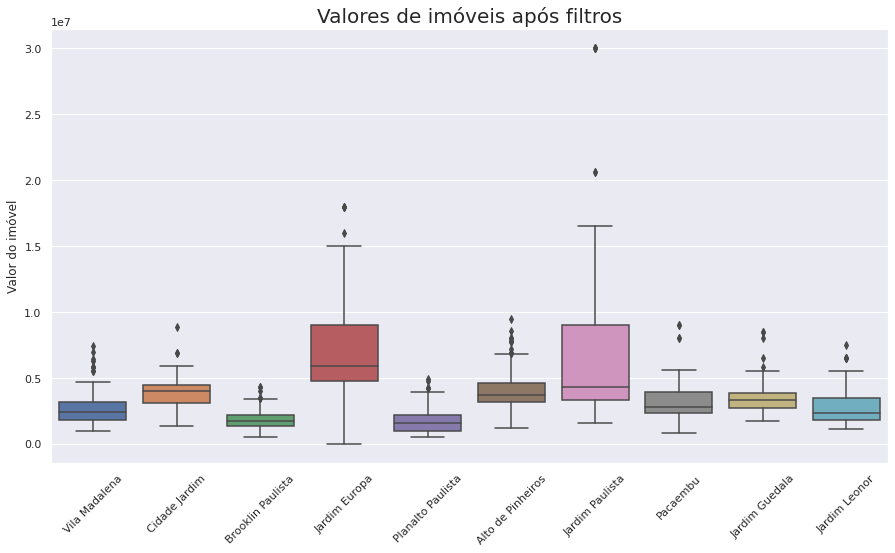

In [614]:
plt.figure(figsize = (15,8))
ax1 = sns.boxplot(data = dados_vendas_filtrado.query("Bairro in @top_bairros"), x = "Bairro", y = "Valor_anuncio_float")
ax1.set_title("Valores de imóveis após filtros", fontsize = 20)
ax1.tick_params(axis = 'x', rotation = 45)
plt.ylabel("Valor do imóvel")
plt.xlabel("")

plt.show()

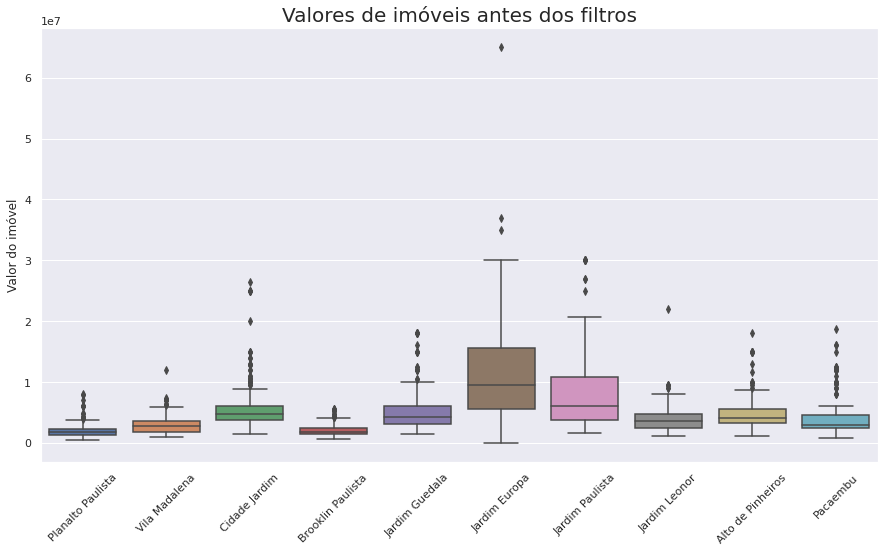

In [615]:
plt.figure(figsize = (15,8))
ax1 = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros"), x = "Bairro", y = "Valor_anuncio_float")
ax1.set_title("Valores de imóveis antes dos filtros", fontsize = 20)
ax1.tick_params(axis = 'x', rotation = 45)
plt.ylabel("Valor do imóvel")
plt.xlabel("")

plt.show()

In [616]:
dados_vendas_filtrado[dados_vendas_filtrado['Bairro'].str.contains('Sítio', na = False)]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2


## 3. Agrupar por mais de uma categoria e realizar as análises.

Já feito dentre os desafios da aula anterior.

In [617]:
bairros_busca = np.random.choice(dados_vendas_filtrado.query("Bairro in @top_bairros")["Bairro"].unique(), 4)
filtro_busca = dados_vendas_filtrado["Bairro"].isin(bairros_busca)
print(bairros_busca)

['Jardim Leonor' 'Jardim Guedala' 'Jardim Europa' 'Cidade Jardim']


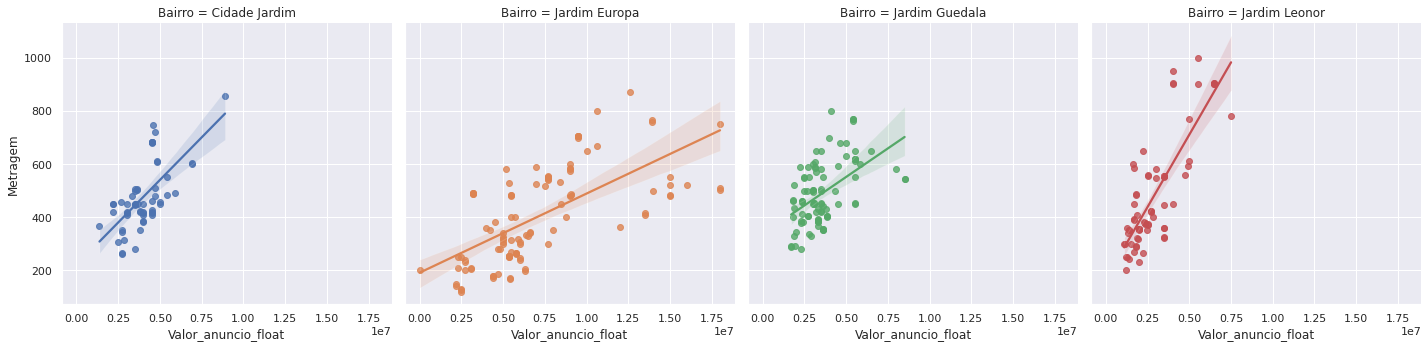

In [618]:
ax4 = sns.lmplot(data = dados_vendas_filtrado[filtro_busca].query("Bairro in @top_bairros"), x = "Valor_anuncio_float", y = "Metragem", hue="Bairro", col = "Bairro")

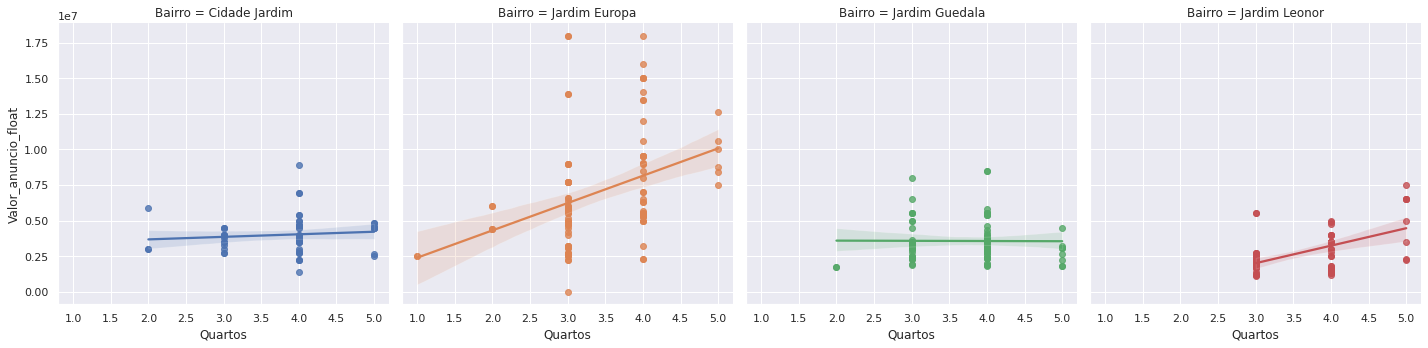

In [619]:
ax5 = sns.lmplot(data = dados_vendas_filtrado[filtro_busca].query("Bairro in @top_bairros"), x = "Quartos", y = "Valor_anuncio_float", hue="Bairro", col = "Bairro")

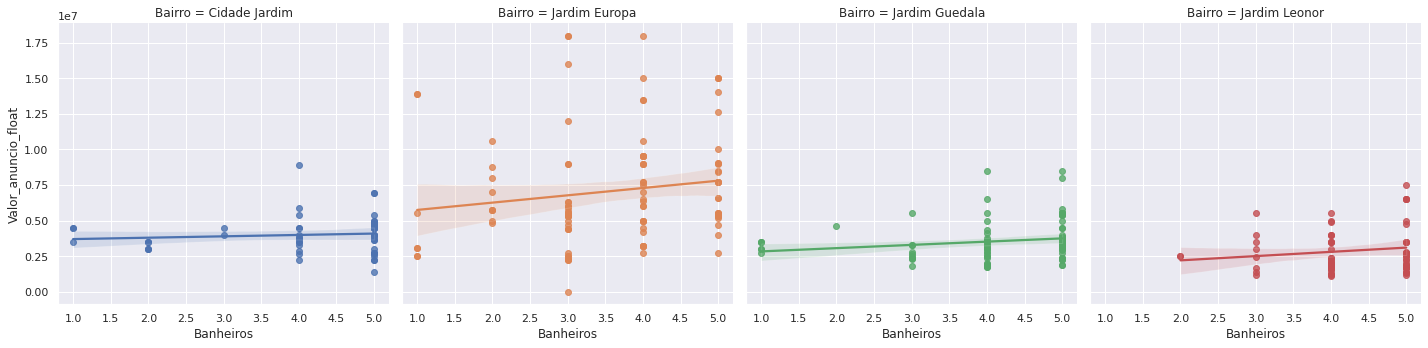

In [620]:
ax6 = sns.lmplot(data = dados_vendas_filtrado[filtro_busca].query("Bairro in @top_bairros"), x = "Banheiros", y = "Valor_anuncio_float", hue="Bairro", col = "Bairro")

## 4. Organize o colab para deixar com cara de projeto.

😀